<a href="https://colab.research.google.com/github/shaurmittal/Custom-GPT/blob/main/Custom_GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

GPT stands for "Generative Pre-trained Transformer." It is a type of artificial intelligence language model developed by OpenAI. The GPT model is built upon a deep learning architecture called the Transformer, which was introduced in the paper "Attention is All You Need" by Vaswani et al. in 2017.

The primary characteristic of GPT is its ability to generate human-like text by predicting the next word in a sequence based on the context of the previous words. The model is exposed to vast amounts of text, allowing it to learn patterns and relationships within the language. This way, GPT becomes familiar with various grammar structures, semantics, and factual information from the training data.

The model can be fine-tuned on specific tasks, like text generation, translation, summarization, question-answering, and more. This makes GPT a versatile language model that can be adapted to various natural language processing tasks.

# 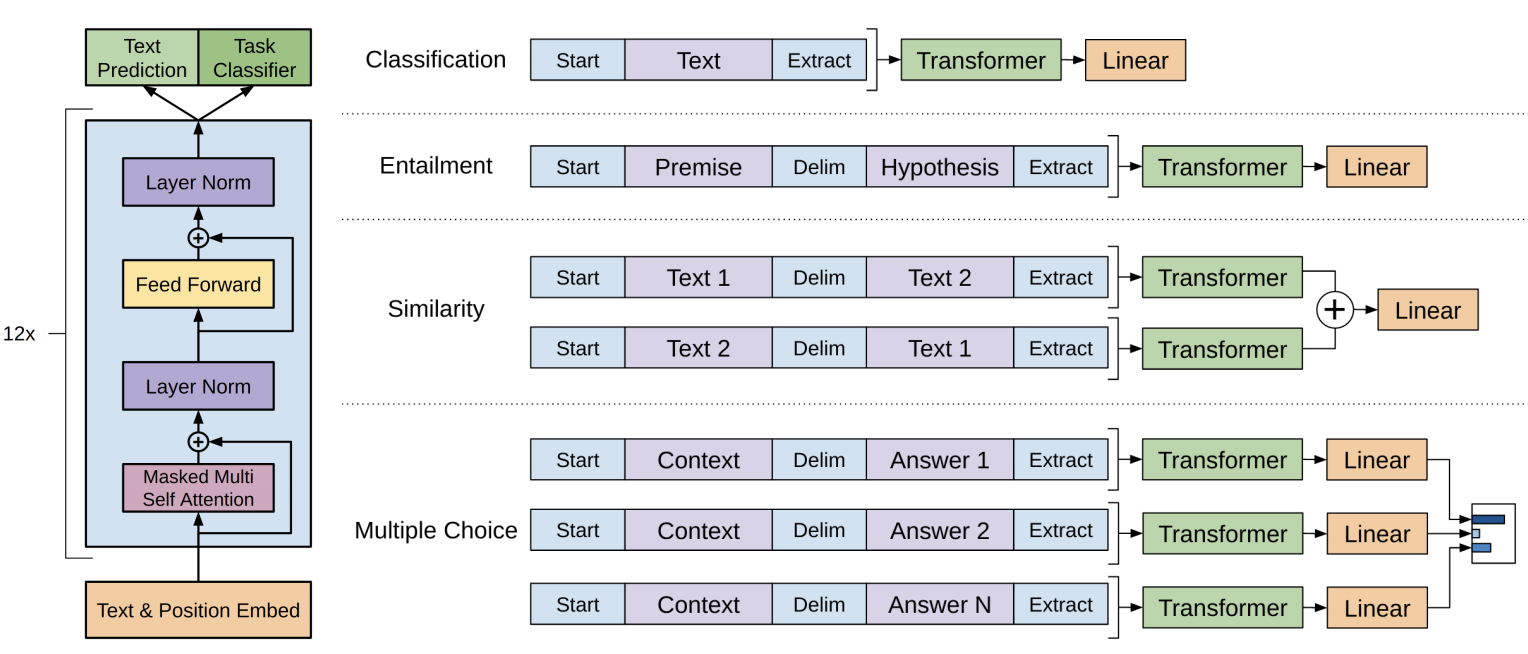

# Install and Import Dependencies

In [ ]:
!pip3 install openai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI


In [ ]:
!git clone https://github.com/karpathy/nanoGPT
%cd nanoGPT

Cloning into 'nanoGPT'...
remote: Enumerating objects: 682, done.
remote: Total 682 (delta 0), reused 0 (delta 0), pack-reused 682 (from 1)
Receiving objects: 100% (682/682), 952.47 KiB | 2.98 MiB/s, done.
Resolving deltas: 100% (385/385), done.
/content/nanoGPT


In [ ]:
!pip install torch numpy transformers datasets tiktoken wandb tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00


# Downloading Shakespeare Data

In [ ]:
!python3 data/shakespeare_char/prepare.py

length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens


# Training on Shakespeare Data

In [ ]:
import torch
using_GPU = torch.cuda.is_available()

In [ ]:
if using_GPU:
  !python3 train.py config/train_shakespeare_char.py

In [ ]:
if not using_GPU:
  !python train.py config/train_shakespeare_char.py --device=cpu --compile=False --eval_iters=20 --log_interval=1 --block_size=64 --batch_size=12 --n_layer=4 --n_head=4 --n_embd=128 --max_iters=2000 --lr_decay_iters=2000 --dropout=0.0

Overriding config with config/train_shakespeare_char.py:
# train a miniature character-level shakespeare model
# good for debugging and playing on macbooks and such

out_dir = 'out-shakespeare-char'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often

# we expect to overfit on this small dataset, so only save when val improves
always_save_checkpoint = False

wandb_log = False # override via command line if you like
wandb_project = 'shakespeare-char'
wandb_run_name = 'mini-gpt'

dataset = 'shakespeare_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters

# baby GPT model :)
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of 

# Testing our Shakespearian Model

In [ ]:
if not using_GPU:
  !python sample.py --out_dir=out-shakespeare-char --device=cpu

Overriding: out_dir = out-shakespeare-char
Overriding: device = cpu
number of parameters: 0.80M
Loading meta from data/shakespeare_char/meta.pkl...

Theren:
For But I fair pleadion, no do all thy Egal
Than heaves aginss were brey: not.

Sevire:
Nother is befy well he the honoun him the in the
Our the care as so for honou fall the wippea,
Which perte our thing him.

TLEONENIUS:
Say, go lies sir.

GLood, thou dow it are a their be.

CLOLIBET:
Hell not stort:
Theing wo not with in blay to seet a onde thess
And but hould the it rie storde carition word wound,
Pecarnury muspe more he hath unter the the to Give shy demay's
The say enter then the a
---------------

Rechild but to boftick true a bust sough;
Not be see in hand then hourse for deater,
And wee his, are have as a dest do of more,
That here you, this to my my spead: I parother
And that it the applain at and thy shall the be are
mistech, in ampin ouce the brow our my all before
A our to sorre then soul plesting speake lie
the have w

# Generate our own Dataset from Wikipedia

In [ ]:
!pip3 install httpx
import httpx
import json
import re
import os
import tiktoken
import numpy as np
import random
from urllib.parse import urlencode

In [ ]:
!mkdir data/wikipediatext

In [ ]:
articles = [
   "Video Games",
   "Fortnite",
   "valorant",
   "Gaming",
   "Esports",
]

In [ ]:
tag_re = re.compile('<.*?>')

base_url = "https://en.wikipedia.org/w/api.php?"
params = {
    "action": "query",
    "format": "json",
    "prop": "extracts",
    "explaintext": "true",
    "titles": "",
}

fp = open("data/wikipediatext/input.json", "w")
for article in articles:
    params["titles"] = article
    url = base_url + urlencode(params)
    while url:
        data = httpx.get(url).json()
        pages = data["query"]["pages"]
        for page_id, page_data in pages.items():
            title = page_data["title"]
            content = page_data.get("extract", "")
            cleaned_content = tag_re.sub('', content)
            fp.write(json.dumps([title, cleaned_content]) + "\n")
        if "continue" in data:
            url = base_url + urlencode(data["continue"])
        else:
            url = None
fp.close()

In [ ]:
input_file_path = 'data/wikipediatext/input.json'

entries = []
with open(input_file_path, 'r') as f:
    for line in f:
        if line.strip():
            entries.append(json.loads(line))

# Shuffle entries
random.shuffle(entries)

n = len(entries)
train_entries = entries[:int(n*0.9)]
val_entries = entries[int(n*0.9):]

# Turn those into strings
train_data = " ".join(
    "{} {}".format(*entry) for entry in train_entries
)
val_data = " ".join(
    "{} {}".format(*entry) for entry in val_entries
)

# encode with tiktoken gpt2 bpe
enc = tiktoken.get_encoding("gpt2")
train_ids = enc.encode_ordinary(train_data)
val_ids = enc.encode_ordinary(val_data)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

# export to bin files
train_ids = np.array(train_ids, dtype=np.uint16)
val_ids = np.array(val_ids, dtype=np.uint16)
train_ids.tofile('data/wikipediatext/train.bin')
val_ids.tofile('data/wikipediatext/val.bin')

train has 17,054 tokens
val has 4,913 tokens


# Training Our Model

In [ ]:
import torch
using_GPU = torch.cuda.is_available()

In [ ]:
if using_GPU:
  !python3 train.py --dataset=wikipediatext --n_layer=4 --n_head=4 --n_embd=64 --compile=False --eval_iters=1 --block_size=64 --batch_size=8 --device=cuda --max_iters=10000 --eval_interval=250

Streaming output truncated to the last 5000 lines.
iter 5041: loss 0.0661, time 662.83ms, mfu 0.20%
iter 5042: loss 0.1056, time 663.02ms, mfu 0.20%
iter 5043: loss 0.0926, time 666.88ms, mfu 0.20%
iter 5044: loss 0.0563, time 658.54ms, mfu 0.20%
iter 5045: loss 0.0845, time 666.74ms, mfu 0.20%
iter 5046: loss 0.0784, time 663.07ms, mfu 0.20%
iter 5047: loss 0.0744, time 667.83ms, mfu 0.20%
iter 5048: loss 0.0758, time 660.05ms, mfu 0.20%
iter 5049: loss 0.0769, time 662.89ms, mfu 0.20%
iter 5050: loss 0.0668, time 665.08ms, mfu 0.20%
iter 5051: loss 0.0664, time 664.08ms, mfu 0.20%
iter 5052: loss 0.0843, time 662.91ms, mfu 0.20%
iter 5053: loss 0.0563, time 666.08ms, mfu 0.20%
iter 5054: loss 0.0867, time 663.77ms, mfu 0.20%
iter 5055: loss 0.0800, time 662.51ms, mfu 0.20%
iter 5056: loss 0.1038, time 664.10ms, mfu 0.20%
iter 5057: loss 0.0769, time 664.52ms, mfu 0.20%
iter 5058: loss 0.0621, time 661.59ms, mfu 0.20%
iter 5059: loss 0.0899, time 665.27ms, mfu 0.20%
iter 5060: loss 0.

# Testing our Custom Wikipedia Model

In [ ]:
if using_GPU:
  !python sample.py

/content/nanoGPT/sample.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=device)
number of parameters: 3.42M
No meta.pkl 